## 분석 데이터 생성 및 상관분석
- 가명처리 : "단지기본정보_ver3.csv" 생성
- 관리비정보 + 단지기본정보 + 관리시설정보 = "아파트전체정보.csv" 생성
- 상관분석 진행 

**분석 데이터 생성 후, 엑셀 작업**
- #7 Graph. 전기계약방식과 준공년도별 평균 공용 전기료
- #8 Graph. 전기계약방식과 세대수별 평균 공용 전기료
- #9 Graph. 단일계약 공동주택 연평균 공용 전기료
- #10 Graph. 종합계약 공동주택 연평균 공용 전기료
- #11 Graph. 단일계약 공동주택 승강기수와 연평균 공용 전기료
- #12 Graph. 종합계약 공동주택 승강기수와 연평균 공용 전기료
- #13 Graph. 단일계약 공동주택 부대복리시설수와 연평균 공용 전기료 
- #14 Graph. 종합계약 공동주택 부대복리시설수와 연평균 공용 전기료
- #15 Graph. 단일계약 공동주택 주차 대수와 연평균 공용 전기료
- #16 Graph. 종합계약 공동주택 주차 대수와 연평균 공용 전기료
- #17 Graph. 공동주택 단지 시설 특성과 전기공용금액과의 상관관계 

In [ ]:
import pandas as pd

In [ ]:
df_fee = pd.read_csv("관리비정보.csv", engine = 'python', encoding = 'utf-8')

In [ ]:
df_basic = pd.read_csv("단지기본정보_ver2.csv", engine = 'python')

In [ ]:
df_fac = pd.read_excel("관리시설정보.xlsx")

In [ ]:
df_fee.head()

,의무,명칭(단지코드),부과년월,난방공용_우리단지총액,난방전용_우리단지총액,급탕공용_우리단지총액,급탕전용_우리단지총액,가스공용_우리단지총액,가스전용_우리단지총액,전기공용_우리단지총액,전기전용_우리단지총액,수도공용_우리단지총액,수도전용_우리단지총액,부과년도,부과월
0,Y,A10024157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y,A10024275,202105.0,0.0,0.0,0.0,0.0,0.0,0.0,6033880.0,27563870.0,-965790.0,12785830.0,2021.0,5.0
2,Y,A10024275,202106.0,0.0,0.0,0.0,0.0,0.0,0.0,6332710.0,29470120.0,-628260.0,13185440.0,2021.0,6.0
3,Y,A10024294,202105.0,0.0,0.0,0.0,0.0,0.0,0.0,3083326.0,1978050.0,35740.0,906230.0,2021.0,5.0
4,Y,A10024294,202106.0,0.0,0.0,0.0,0.0,0.0,0.0,3485564.0,4251350.0,15460.0,1664750.0,2021.0,6.0


In [ ]:
df_basic.head()

,의무,명칭(단지코드),단지분류,법정동주소,도로명주소,분양형태,관리방식,난방방식,복도유형,연면적,...,60㎡이하,60㎡초과 85㎡이하),85㎡초과 135㎡이하),135㎡초과,행정구,법정동,사용승인년도,사용승인년도_범위,세대수_범위,가명칭
0,Y,A30680101,아파트,대전광역시 대덕구 대화동 31-36,대전광역시 대덕구 대화1길 77,분양,자치관리,개별난방,복도식,31918.2506,...,423,0,0,0,대덕구,대화동,2001,2010,500,DA1
1,Y,A30680301,아파트,대전광역시 대덕구 덕암동 3-7,대전광역시 대덕구 덕암로265번길 81,분양,위탁관리,개별난방,복도식,18643.2950,...,250,0,0,0,대덕구,덕암동,1998,2000,300,DA2
2,Y,A30620001,아파트,대전광역시 대덕구 덕암동 45-2,대전광역시 대덕구 덕암로234번길 15,분양,위탁관리,개별난방,계단식,35921.3250,...,100,118,74,0,대덕구,덕암동,2000,2010,300,DA3
3,Y,A30676202,아파트,대전광역시 대덕구 목상동 185-1,대전광역시 대덕구 대덕대로1470번길 27,분양,위탁관리,지역난방,계단식,46333.0800,...,456,0,0,0,대덕구,목상동,1999,2000,500,DA4
4,Y,A30676003,아파트,대전광역시 대덕구 목상동 185-2,대전광역시 대덕구 대덕대로1470번길 55,분양,위탁관리,지역난방,복도식,63078.6000,...,900,0,0,0,대덕구,목상동,1993,2000,1100,DA5


In [ ]:
df_fac.head()

,의무,명칭(단지코드),일반관리,경비관리,청소관리,소독관리,건물구조,수전용량,세대전기계약방식,전기안전관리자법정선임여부,...,부대복리시설3,부대복리시설4,부대복리시설5,부대복리시설6,부대복리시설7,부대복리시설8,부대복리시설9,부대복리시설10,부대복리시설11,부대복리시설수
0,Y,A30002004,위탁관리,위탁관리,위탁관리,위탁관리,철근콘크리트구조,1500,단일계약,상주선임,...,보육시설,주민공동시설,어린이놀이터,유치원,자전거보관소,NaN,NaN,NaN,NaN,7
1,Y,A30004001,자치관리,자치관리(직영),자치관리(직영),위탁관리,철근콘크리트구조,100,종합계약,선정안함,...,어린이놀이터,자전거보관소,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Y,A30005002,위탁관리,위탁관리,위탁관리,위탁관리,철근콘크리트구조,1500,단일계약,상주선임,...,어린이놀이터,자전거보관소,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,Y,A30005004,위탁관리,위탁관리,위탁관리,위탁관리,철근콘크리트구조,1650,단일계약,상주선임,...,주민공동시설,어린이놀이터,자전거보관소,NaN,NaN,NaN,NaN,NaN,NaN,5
4,Y,A30005005,위탁관리,자치관리(직영),위탁관리,위탁관리,철근콘크리트구조,2200,단일계약,상주선임,...,보육시설,주민공동시설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


### 사용하지 않는 열 제거

In [ ]:
df_fee.columns

Index(['의무', '명칭(단지코드)', '부과년월', '난방공용_우리단지총액', '난방전용_우리단지총액', '급탕공용_우리단지총액',
       '급탕전용_우리단지총액', '가스공용_우리단지총액', '가스전용_우리단지총액', '전기공용_우리단지총액',
       '전기전용_우리단지총액', '수도공용_우리단지총액', '수도전용_우리단지총액', '부과년도', '부과월'],
      dtype='object')

In [ ]:
df_basic.columns

Index(['의무', '명칭(단지코드)', '단지분류', '법정동주소', '도로명주소', '분양형태', '관리방식', '난방방식',
       '복도유형', '연면적', '사용승인일', '동수', '세대수', '주거전용면적', '시공사', '시행사', '60㎡이하',
       '60㎡초과 \n\n85㎡이하)', '85㎡초과\n\n135㎡이하)', '135㎡초과', '행정구', '법정동',
       '사용승인년도', '사용승인년도_범위', '세대수_범위', '가명칭'],
      dtype='object')

In [ ]:
df_fac.columns

Index(['의무', '명칭(단지코드)', '일반관리', '경비관리', '청소관리', '소독관리', '건물구조', '수전용량',
       '세대전기계약방식', '전기안전관리자법정선임여부', '화재수신반방식', '급수방식', '승강기관리형태', '승강기대수',
       '지상', '지하', '주차관제.홈네트워크', 'CCTV대수', '부대복리시설1', '부대복리시설2', '부대복리시설3',
       '부대복리시설4', '부대복리시설5', '부대복리시설6', '부대복리시설7', '부대복리시설8', '부대복리시설9',
       '부대복리시설10', '부대복리시설11', '부대복리시설수'],
      dtype='object')

In [ ]:
df_fee_drop = df_fee.drop(['난방공용_우리단지총액', '난방전용_우리단지총액', '급탕공용_우리단지총액',
       '급탕전용_우리단지총액', '가스공용_우리단지총액', '가스전용_우리단지총액', 
             '전기전용_우리단지총액', '수도공용_우리단지총액', '수도전용_우리단지총액'], axis = 1)

In [ ]:
df_basic_drop = df_basic.drop(['도로명주소', '분양형태', '관리방식', '난방방식',
       '복도유형', '연면적','주거전용면적', '시공사', '시행사', '60㎡이하',
       '60㎡초과 \n\n85㎡이하)', '85㎡초과\n\n135㎡이하)', '135㎡초과' ], axis = 1)

In [ ]:
df_fac_drop = df_fac.drop(['일반관리', '경비관리', '청소관리', '소독관리', '건물구조', '수전용량',
                           '전기안전관리자법정선임여부', '화재수신반방식', '급수방식', '승강기관리형태',
                          '부대복리시설1', '부대복리시설2', '부대복리시설3',
       '부대복리시설4', '부대복리시설5', '부대복리시설6', '부대복리시설7', '부대복리시설8', '부대복리시설9',
       '부대복리시설10', '부대복리시설11'], axis = 1)

In [ ]:
df_fee_drop.head()

,의무,명칭(단지코드),부과년월,전기공용_우리단지총액,부과년도,부과월
0,Y,A10024157,NaN,NaN,NaN,NaN
1,Y,A10024275,202105.0,6033880.0,2021.0,5.0
2,Y,A10024275,202106.0,6332710.0,2021.0,6.0
3,Y,A10024294,202105.0,3083326.0,2021.0,5.0
4,Y,A10024294,202106.0,3485564.0,2021.0,6.0


In [ ]:
df_basic_drop.head()

,의무,명칭(단지코드),단지분류,법정동주소,사용승인일,동수,세대수,행정구,법정동,사용승인년도,사용승인년도_범위,세대수_범위,가명칭
0,Y,A30680101,아파트,대전광역시 대덕구 대화동 31-36,20010711,1,423,대덕구,대화동,2001,2010,500,DA1
1,Y,A30680301,아파트,대전광역시 대덕구 덕암동 3-7,19981117,1,250,대덕구,덕암동,1998,2000,300,DA2
2,Y,A30620001,아파트,대전광역시 대덕구 덕암동 45-2,20001030,4,292,대덕구,덕암동,2000,2010,300,DA3
3,Y,A30676202,아파트,대전광역시 대덕구 목상동 185-1,19990227,7,456,대덕구,목상동,1999,2000,500,DA4
4,Y,A30676003,아파트,대전광역시 대덕구 목상동 185-2,19930909,5,900,대덕구,목상동,1993,2000,1100,DA5


In [ ]:
df_fac_drop.head()

,의무,명칭(단지코드),세대전기계약방식,승강기대수,지상,지하,주차관제.홈네트워크,CCTV대수,부대복리시설수
0,Y,A30002004,단일계약,20,324.0,415,무,91,7
1,Y,A30004001,종합계약,0,150.0,0,무,4,4
2,Y,A30005002,단일계약,11,44.0,477,무,119,4
3,Y,A30005004,단일계약,17,168.0,514,무,120,5
4,Y,A30005005,단일계약,14,111.0,634,무,160,4


### 가명처리
- 가명칭 : 법정동 명 + 임의의 숫자  

In [ ]:
df_basic_drop = df_basic_drop.drop('가명칭', axis = 1)

In [ ]:
df_basic_drop['가명칭'] = ''

In [ ]:
df_basic_drop['법정동'][0][:-1]

'대화'

In [ ]:
법정동 = list(df_basic_drop['법정동'].unique())

In [ ]:
법정동.sort()

In [ ]:
법정동

['가수원동',
 '가양동',
 '가오동',
 '가장동',
 '가정동',
 '갈마동',
 '계산동',
 '관저동',
 '관평동',
 '괴정동',
 '교촌동',
 '구암동',
 '궁동',
 '낭월동',
 '내동',
 '노은동',
 '대동',
 '대사동',
 '대성동',
 '대정동',
 '대화동',
 '대흥동',
 '덕명동',
 '덕암동',
 '도룡동',
 '도마동',
 '도안동',
 '둔산동',
 '만년동',
 '목동',
 '목상동',
 '문지동',
 '문화동',
 '반석동',
 '법동',
 '변동',
 '복수동',
 '봉명동',
 '봉산동',
 '비래동',
 '사정동',
 '산성동',
 '삼성동',
 '상대동',
 '상서동',
 '석봉동',
 '선화동',
 '성남동',
 '송강동',
 '송촌동',
 '신대동',
 '신성동',
 '신일동',
 '신탄진',
 '신흥동',
 '어은동',
 '연축동',
 '오류동',
 '오정동',
 '와동',
 '용두동',
 '용문동',
 '용산동',
 '용운동',
 '용전동',
 '원내동',
 '원신흥',
 '월평동',
 '유천동',
 '읍내동',
 '인동',
 '자양동',
 '장대동',
 '전민동',
 '정림동',
 '죽동',
 '중리동',
 '중촌동',
 '지족동',
 '천동',
 '탄방동',
 '태평동',
 '판암동',
 '평촌동',
 '하기동',
 '홍도동',
 '효동']

In [ ]:
df_basic_drop = df_basic_drop.sort_values(by = '법정동', ascending = False)

In [ ]:
df_basic_drop

,의무,명칭(단지코드),단지분류,법정동주소,사용승인일,동수,세대수,행정구,법정동,사용승인년도,사용승인년도_범위,세대수_범위,가명칭
0,Y,A30680101,아파트,대전광역시 대덕구 대화동 31-36,20010711,1,423,대덕구,대화동,2001,2010,500,대화1
1,Y,A30680301,아파트,대전광역시 대덕구 덕암동 3-7,19981117,1,250,대덕구,덕암동,1998,2000,300,덕암1
2,Y,A30620001,아파트,대전광역시 대덕구 덕암동 45-2,20001030,4,292,대덕구,덕암동,2000,2010,300,덕암2
3,Y,A30676202,아파트,대전광역시 대덕구 목상동 185-1,19990227,7,456,대덕구,목상동,1999,2000,500,목상1
4,Y,A30676003,아파트,대전광역시 대덕구 목상동 185-2,19930909,5,900,대덕구,목상동,1993,2000,1100,목상2
5,Y,A30676004,아파트,대전광역시 대덕구 목상동 207-25,20110729,3,199,대덕구,목상동,2011,2020,300,목상3
6,Y,A30606001,아파트,대전광역시 대덕구 법동 190,19930703,9,810,대덕구,법동,1993,2000,900,법1
7,Y,A30675903,아파트,대전광역시 대덕구 법동 191-1,19950519,14,1735,대덕구,법동,1995,2000,4000,법2
8,Y,A30675801,아파트,대전광역시 대덕구 법동 195-1,19931112,12,1050,대덕구,법동,1993,2000,1100,법3
9,Y,A30679403,아파트,대전광역시 대덕구 법동 280-2,19891019,4,480,대덕구,법동,1989,1990,500,법4


In [ ]:
cnt  = 1
for j in 법정동:
    for i in range(len(df_basic_drop)):
        print(j)
        if df_basic_drop.loc[i, '법정동'] == j:
            df_basic_drop.loc[i, '가명칭'] = df_basic_drop.loc[i, '법정동'][:-1] + str(cnt)
            cnt += 1
        else:
            cnt = 1
            continue 

가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동
가수원동


계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동
계산동


구암동
구암동
구암동
구암동
구암동
구암동
구암동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동
궁동


대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동
대흥동


도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
도안동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동
둔산동


복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동
복수동


삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동
삼성동


송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동
송촌동


어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동
어은동


용문동
용문동
용문동
용문동
용문동
용문동
용문동
용문동
용문동
용문동
용문동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동
용산동


읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동
읍내동


죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
죽동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중리동
중

판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동
판암동


In [ ]:
df_basic_drop = df_basic_drop.sort_index()

In [ ]:
df_basic_drop

,의무,명칭(단지코드),단지분류,법정동주소,사용승인일,동수,세대수,행정구,법정동,사용승인년도,사용승인년도_범위,세대수_범위,가명칭
0,Y,A30680101,아파트,대전광역시 대덕구 대화동 31-36,20010711,1,423,대덕구,대화동,2001,2010,500,대화1
1,Y,A30680301,아파트,대전광역시 대덕구 덕암동 3-7,19981117,1,250,대덕구,덕암동,1998,2000,300,덕암1
2,Y,A30620001,아파트,대전광역시 대덕구 덕암동 45-2,20001030,4,292,대덕구,덕암동,2000,2010,300,덕암2
3,Y,A30676202,아파트,대전광역시 대덕구 목상동 185-1,19990227,7,456,대덕구,목상동,1999,2000,500,목상1
4,Y,A30676003,아파트,대전광역시 대덕구 목상동 185-2,19930909,5,900,대덕구,목상동,1993,2000,1100,목상2
5,Y,A30676004,아파트,대전광역시 대덕구 목상동 207-25,20110729,3,199,대덕구,목상동,2011,2020,300,목상3
6,Y,A30606001,아파트,대전광역시 대덕구 법동 190,19930703,9,810,대덕구,법동,1993,2000,900,법1
7,Y,A30675903,아파트,대전광역시 대덕구 법동 191-1,19950519,14,1735,대덕구,법동,1995,2000,4000,법2
8,Y,A30675801,아파트,대전광역시 대덕구 법동 195-1,19931112,12,1050,대덕구,법동,1993,2000,1100,법3
9,Y,A30679403,아파트,대전광역시 대덕구 법동 280-2,19891019,4,480,대덕구,법동,1989,1990,500,법4


In [ ]:
df_basic_drop.to_csv("단지기본정보_ver3.csv", encoding = 'utf-8', index = False)

### 아파트전체정보 생성
- 관리비정보 + 단지기본정보 + 관리시설정보
- 명칭(단지코드) 기준으로 데이터 셋 병합

In [ ]:
df_fee_drop = df_fee_drop.drop('의무', axis = 1)

In [ ]:
df_basic_drop = df_basic_drop.drop('의무', axis = 1)

In [ ]:
df_fac_drop = df_fac_drop.drop('의무', axis = 1)

In [ ]:
df_fee_drop.head()

,명칭(단지코드),부과년월,전기공용_우리단지총액,부과년도,부과월
0,A10024157,NaN,NaN,NaN,NaN
1,A10024275,202105.0,6033880.0,2021.0,5.0
2,A10024275,202106.0,6332710.0,2021.0,6.0
3,A10024294,202105.0,3083326.0,2021.0,5.0
4,A10024294,202106.0,3485564.0,2021.0,6.0


In [ ]:
df_basic_drop.head()

,명칭(단지코드),단지분류,법정동주소,사용승인일,동수,세대수,행정구,법정동,사용승인년도,사용승인년도_범위,세대수_범위,가명칭
0,A30680101,아파트,대전광역시 대덕구 대화동 31-36,20010711,1,423,대덕구,대화동,2001,2010,500,대화1
1,A30680301,아파트,대전광역시 대덕구 덕암동 3-7,19981117,1,250,대덕구,덕암동,1998,2000,300,덕암1
2,A30620001,아파트,대전광역시 대덕구 덕암동 45-2,20001030,4,292,대덕구,덕암동,2000,2010,300,덕암2
3,A30676202,아파트,대전광역시 대덕구 목상동 185-1,19990227,7,456,대덕구,목상동,1999,2000,500,목상1
4,A30676003,아파트,대전광역시 대덕구 목상동 185-2,19930909,5,900,대덕구,목상동,1993,2000,1100,목상2


In [ ]:
df_fac_drop.head()

,명칭(단지코드),세대전기계약방식,승강기대수,지상,지하,주차관제.홈네트워크,CCTV대수,부대복리시설수
0,A30002004,단일계약,20,324.0,415,무,91,7
1,A30004001,종합계약,0,150.0,0,무,4,4
2,A30005002,단일계약,11,44.0,477,무,119,4
3,A30005004,단일계약,17,168.0,514,무,120,5
4,A30005005,단일계약,14,111.0,634,무,160,4


In [ ]:
# df_fee_drop, df_basic_drop, df_fac_drop 합치기 
merge_left = pd.merge(df_fee_drop, df_basic_drop, how = 'left', left_on = '명칭(단지코드)', right_on = '명칭(단지코드)')

In [ ]:
merge_whole = pd.merge(merge_left, df_fac_drop, how = 'left', left_on = '명칭(단지코드)', right_on = '명칭(단지코드)')

In [ ]:
merge_whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17448 entries, 0 to 17447
Data columns (total 23 columns):
명칭(단지코드)       17448 non-null object
부과년월           17447 non-null float64
전기공용_우리단지총액    17447 non-null float64
부과년도           17447 non-null float64
부과월            17447 non-null float64
단지분류           17448 non-null object
법정동주소          17448 non-null object
사용승인일          17448 non-null int64
동수             17448 non-null int64
세대수            17448 non-null int64
행정구            17448 non-null object
법정동            17448 non-null object
사용승인년도         17448 non-null int64
사용승인년도_범위      17448 non-null int64
세대수_범위         17448 non-null int64
가명칭            17448 non-null object
세대전기계약방식       17448 non-null object
승강기대수          17448 non-null int64
지상             17427 non-null float64
지하             17448 non-null int64
주차관제.홈네트워크     17427 non-null object
CCTV대수         17448 non-null int64
부대복리시설수        17448 non-null int64
dtypes: float64(5), int64(10), object(8)
memo

In [ ]:
merge_whole.head(5)

,명칭(단지코드),부과년월,전기공용_우리단지총액,부과년도,부과월,단지분류,법정동주소,사용승인일,동수,세대수,...,사용승인년도_범위,세대수_범위,가명칭,세대전기계약방식,승강기대수,지상,지하,주차관제.홈네트워크,CCTV대수,부대복리시설수
0,A10024157,NaN,NaN,NaN,NaN,아파트,대전광역시 유성구 봉명동 676-4,20180213,1,162,...,2020,300,봉명22,단일계약,2,0.0,94,무,51,1
1,A10024275,202105.0,6033880.0,2021.0,5.0,아파트,대전광역시 서구 탄방동 59-1,20200427,10,776,...,2020,900,탄방1,단일계약,26,44.0,935,유,384,9
2,A10024275,202106.0,6332710.0,2021.0,6.0,아파트,대전광역시 서구 탄방동 59-1,20200427,10,776,...,2020,900,탄방1,단일계약,26,44.0,935,유,384,9
3,A10024294,202105.0,3083326.0,2021.0,5.0,주상복합,대전광역시 중구 오류동 170-5,20210428,1,154,...,2020,300,오류1,종합계약,5,15.0,198,무,51,3
4,A10024294,202106.0,3485564.0,2021.0,6.0,주상복합,대전광역시 중구 오류동 170-5,20210428,1,154,...,2020,300,오류1,종합계약,5,15.0,198,무,51,3


In [ ]:
merge_whole.shape

(17448, 23)

In [ ]:
merge_whole.to_csv("아파트전체정보.csv", index = False, encoding = 'utf-8')

### 상관분석

In [ ]:
import pandas as pd
merge_whole = pd.read_csv("아파트전체정보.csv", engine = 'python', encoding = 'utf-8')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline 

In [ ]:
# 레티나 디스플레이(고밀도 화소를 가진 화질)를 지원하도록 해서 한글이 흐릿하게 보이는 현상을 개선
%config InlineBackend.figure_format = 'retina'

In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
plt.rc('font', family = 'NanumBarunGothic')
print(plt.rcParams['font.family'])
%matplotlib inline

['NanumBarunGothic']


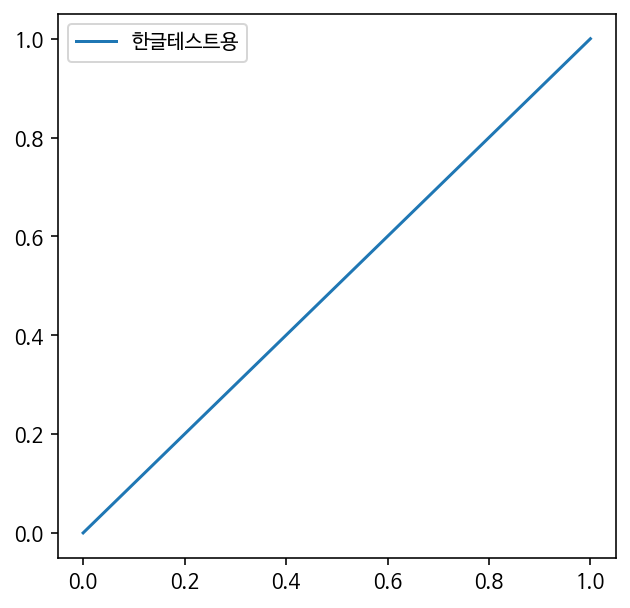

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [ ]:
merge_whole.columns

Index(['명칭(단지코드)', '부과년월', '전기공용_우리단지총액', '부과년도', '부과월', '단지분류', '법정동주소',
       '사용승인일', '동수', '세대수', '행정구', '법정동', '사용승인년도', '사용승인년도_범위', '세대수_범위',
       '가명칭', '세대전기계약방식', '승강기대수', '지상', '지하', '주차관제.홈네트워크', 'CCTV대수',
       '부대복리시설수'],
      dtype='object')

In [ ]:
merge_whole.head(5)

,명칭(단지코드),부과년월,전기공용_우리단지총액,부과년도,부과월,단지분류,법정동주소,사용승인일,동수,세대수,...,사용승인년도_범위,세대수_범위,가명칭,세대전기계약방식,승강기대수,지상,지하,주차관제.홈네트워크,CCTV대수,부대복리시설수
0,A10024157,NaN,NaN,NaN,NaN,아파트,대전광역시 유성구 봉명동 676-4,20180213,1,162,...,2020,300,봉명22,단일계약,2,0.0,94,무,51,1
1,A10024275,202105.0,6033880.0,2021.0,5.0,아파트,대전광역시 서구 탄방동 59-1,20200427,10,776,...,2020,900,탄방1,단일계약,26,44.0,935,유,384,9
2,A10024275,202106.0,6332710.0,2021.0,6.0,아파트,대전광역시 서구 탄방동 59-1,20200427,10,776,...,2020,900,탄방1,단일계약,26,44.0,935,유,384,9
3,A10024294,202105.0,3083326.0,2021.0,5.0,주상복합,대전광역시 중구 오류동 170-5,20210428,1,154,...,2020,300,오류1,종합계약,5,15.0,198,무,51,3
4,A10024294,202106.0,3485564.0,2021.0,6.0,주상복합,대전광역시 중구 오류동 170-5,20210428,1,154,...,2020,300,오류1,종합계약,5,15.0,198,무,51,3


In [ ]:
df_corr = merge_whole.loc[:, ['전기공용_우리단지총액',  '승강기대수', '부대복리시설수', '지상', '지하']]

In [ ]:
df_corr = df_corr.dropna(axis = 0)

In [ ]:
df_corr = df_corr.rename({'전기공용_우리단지총액': '공용 전기료', '지상': '지상주차대수', '지하':'지하주차대수'}, axis = 1)

In [ ]:
df_corr.head()

,공용 전기료,승강기대수,부대복리시설수,지상주차대수,지하주차대수
1,6033880.0,26,9,44.0,935
2,6332710.0,26,9,44.0,935
3,3083326.0,5,3,15.0,198
4,3485564.0,5,3,15.0,198
5,0.0,50,8,330.0,2320


In [ ]:
df_corr_result = df_corr.corr(method='pearson')

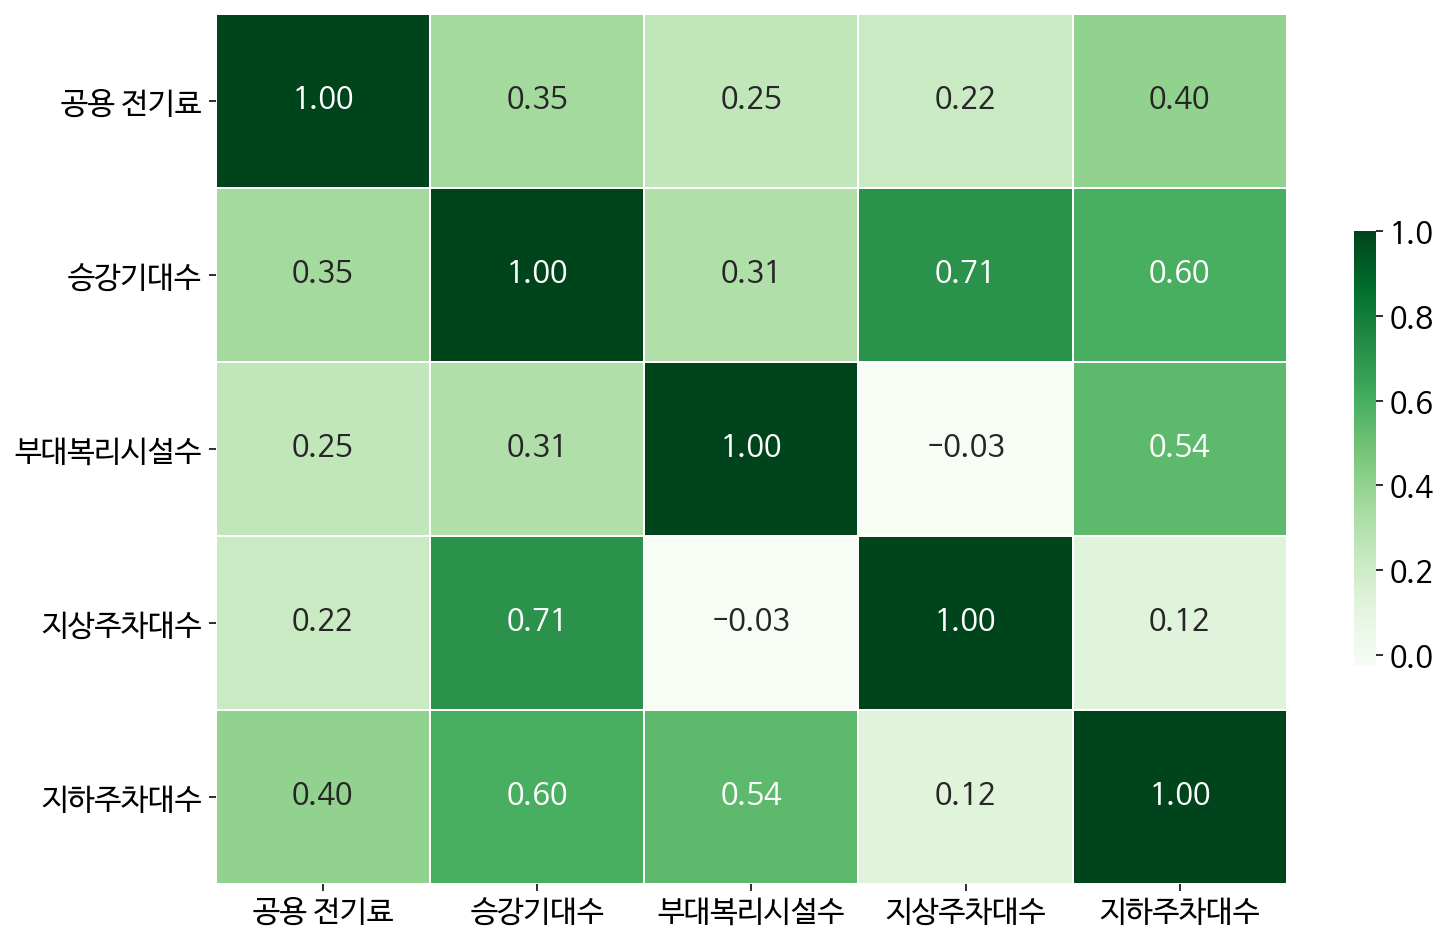

In [ ]:
plt.figure(figsize=(12,8))
plt.rc('font', size=15)    
sns.heatmap(data = df_corr_result, 
            annot=True, fmt='.2f',  
            linewidths=.5, # 경계면 실선으로 구분하기 
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
           # vmin = -1,vmax = 1,  # 컬러바 범위 -1 ~ 1
            cmap='Greens')

In [ ]:
type(df_corr_result)

pandas.core.frame.DataFrame

In [ ]:
df_corr_result.to_csv("아파트단지시설특성과전기공용금액과의상관관계.csv", encoding='cp949', index =False)